In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from sklearn.manifold import TSNE

In [3]:
# import pickle

# file_path = "../w2v2_vectors/layer_reprs_large_ft.pkl"

# with open(file_path, "rb") as file:
#     layer_reprs = pickle.load(file)


In [4]:
import pickle

file_path = "../w2v2_vectors/layer_reprs_large_pt_2.pkl"

with open(file_path, "rb") as file:
    layer_reprs = pickle.load(file)


In [5]:
import os

audio_folder = '/home/badr/explore_wav2vec/spoken_digit/speech_data'
audio_files = []

for file in os.listdir(audio_folder):
    if file.endswith('.wav') or file.endswith('.mp3'):
        audio_files.append(os.path.join(audio_folder, file))



In [6]:

metadata = {}

for file in audio_files:
    file_name = os.path.basename(file)
    label, speaker_id, sample_number = file_name.split('_')
    
    # Store metadata
    metadata[file_name] = {
        'label': label,
        'speaker_id': speaker_id,
        'sample_number': sample_number.split('.')[0]
    }


In [7]:
metadata[audio_files[0].split('/')[-1]]

{'label': '4', 'speaker_id': 'nicolas', 'sample_number': '28'}

In [8]:
# Get metadata in lists 
# Iterate over the layers and plot the representations
speaker_ids, labels = [], []

for sample_ID in layer_reprs:
    speaker_id = metadata[sample_ID]['speaker_id']
    label = int(metadata[sample_ID]['label'])

    speaker_ids.append(speaker_id)
    labels.append(label)

In [9]:
digit2word = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}

In [10]:
def calculate_tsne_layer_representations(layer_reprs):
    """
    Calculates T-SNE layer representations for each layer in the given layer representations.

    Args:
        layer_reprs (dict): A dictionary containing layer representations for each sample ID.

    Returns:
        list: A list of T-SNE layer representations for each layer.
    """
    tsne_layer_representations = []

    num_layers = len(layer_reprs[list(layer_reprs.keys())[0]])

    for layer_index in range(1, num_layers):
        # Extract representations from the specified layer
        layer_representations = []

        for sample_ID in layer_reprs:
            layer_representations.append(layer_reprs[sample_ID][layer_index].mean(dim=1).squeeze().numpy())

        # Convert the representations to a NumPy array
        layer_representations = np.array(layer_representations)

        # Perform T-SNE dimensionality reduction
        tsne = TSNE(n_components=2, random_state=42)
        tsne_representation = tsne.fit_transform(layer_representations)

        tsne_layer_representations.append(tsne_representation)

    return tsne_layer_representations


In [11]:

def plot_tsne(tsne_representation, labels, label2word):
    """
    Plots 2D t-SNE representations for each layer.

    Parameters:
    - tsne_representation (list of numpy arrays): List of t-SNE representations for each layer.
    - labels (numpy array): Array of labels for each data point.
    - label2word (dict): Dictionary mapping label indices to corresponding words.

    Returns:
    - None

    This function plots t-SNE representations for each layer in a grid of subplots. Each subplot represents a layer,
    and the t-SNE representations are plotted as scatter plots. The color of each data point in the scatter plot
    corresponds to its label. The legend at the bottom of the plot shows the color labels and their corresponding words.
    """
    
    # Define the number of rows and columns for the subplot matrix
    num_rows = len(tsne_representation) // 6
    num_cols = 6

    # Create a new figure and set the size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 2*num_rows))

    # Flatten the axes array
    axes = axes.flatten()

    # Iterate over the layers and plot t-sne representations
    for i, tsne_rep in enumerate(tsne_representation):

        # Plot the representations in the current subplot
        scatter = axes[i].scatter(tsne_rep[:, 0], tsne_rep[:, 1], c=labels, cmap='tab10', alpha=0.1, marker='.')
        axes[i].set_title(f'Layer {i+1}', fontsize=10)
        axes[i].set_xticks([])
        axes[i].set_yticks([])

    # Remove any extra subplots
    for j in range(len(axes)):
        if j >= len(tsne_representation):
            fig.delaxes(axes[j])

    # Adjust the spacing between subplots
    #fig.tight_layout()

    # Add legend with color labels at the bottom
    legend_labels = [label2word[i].upper() for i in np.unique(labels)]

    legend_handles = [
        plt.Line2D(
            [0], 
            [0], 
            marker='.', 
            color='w', 
            markerfacecolor=scatter.get_cmap()(scatter.norm(label)), markersize=10) for label in np.unique(labels)
        ]

    fig.legend(legend_handles, legend_labels, loc='lower center', ncol=len(legend_labels), bbox_to_anchor=(0.5, -0.1))

    fig.tight_layout()

    plt.show()

In [11]:
tsne_layer_representations_large_ft = calculate_tsne_layer_representations(layer_reprs)

NameError: name 'layer_reprs' is not defined

In [12]:
plot_tsne(tsne_layer_representations_large_ft, labels, digit2word)

NameError: name 'tsne_layer_representations_large_ft' is not defined

In [12]:
from sklearn.preprocessing import LabelEncoder

# Convert the categorical list into a list of integers
label_encoder = LabelEncoder()
speaker_ids_encoded = label_encoder.fit_transform(speaker_ids)

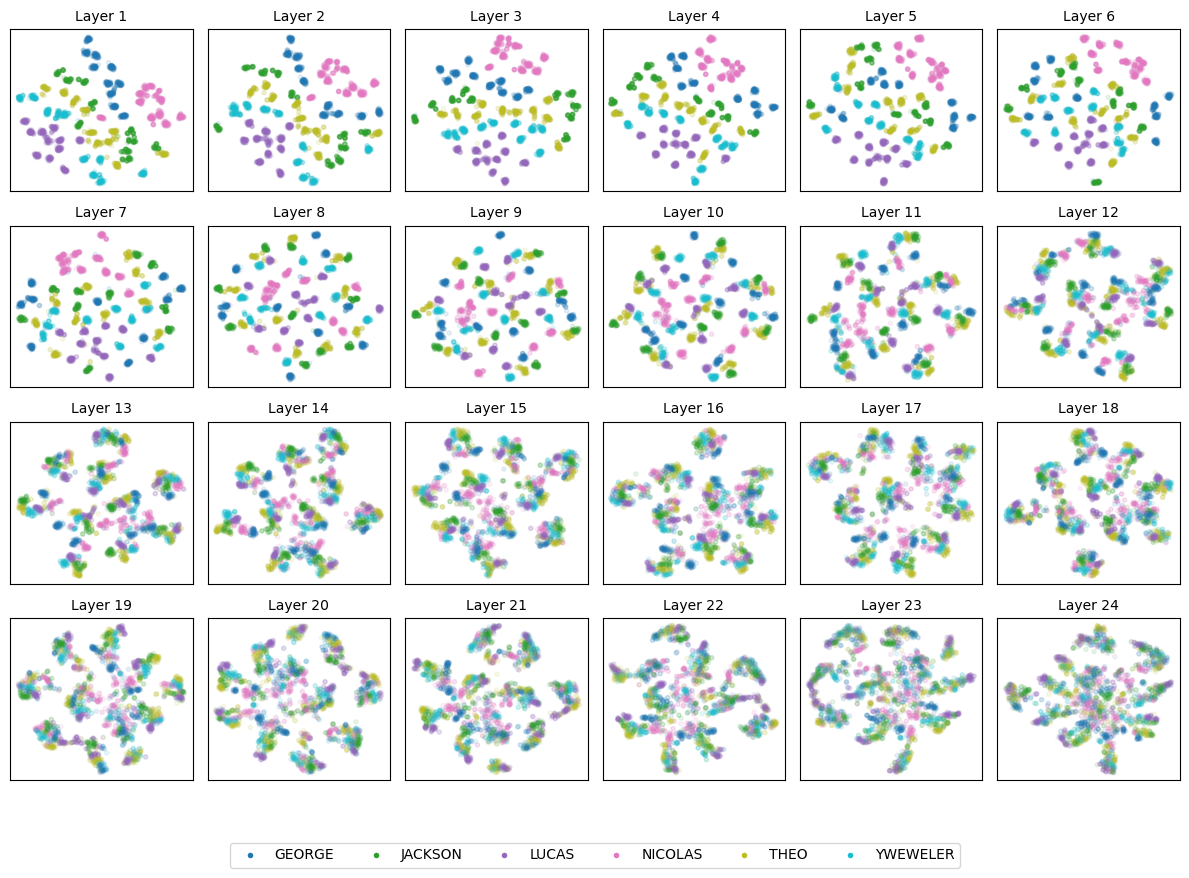

In [16]:
spkr2word = {i: spkr for (i, spkr) in enumerate(np.unique(speaker_ids))}

plot_tsne(tsne_layer_representations_large_ft, speaker_ids_encoded, spkr2word)

In [13]:
k = 0

for i, (digit, spkr) in enumerate(zip(labels, speaker_ids_encoded)):
    if digit == 0 and spkr == 0:
        print(i, digit, spkr)
        k += 1
k

46 0 0
69 0 0
154 0 0
171 0 0
427 0 0
434 0 0
533 0 0
574 0 0
598 0 0
845 0 0
861 0 0
921 0 0
1084 0 0
1086 0 0
1159 0 0
1183 0 0
1256 0 0
1297 0 0
1379 0 0
1469 0 0
1472 0 0
1507 0 0
1573 0 0
1627 0 0
1632 0 0
1643 0 0
1841 0 0
1874 0 0
1966 0 0
1970 0 0
2016 0 0
2022 0 0
2084 0 0
2105 0 0
2194 0 0
2204 0 0
2212 0 0
2258 0 0
2273 0 0
2385 0 0
2425 0 0
2573 0 0
2620 0 0
2633 0 0
2685 0 0
2803 0 0
2851 0 0
2875 0 0
2931 0 0
2963 0 0


50

In [14]:
len(speaker_ids_encoded), len(labels)

(3000, 3000)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a pipeline with feature standardization and linear classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [16]:
for layer_index in range(0, 25):

    digit2spkrs = defaultdict(lambda: defaultdict(list))


    for sample_ID in layer_reprs:
        speaker_id = metadata[sample_ID]['speaker_id']
        label = int(metadata[sample_ID]['label'])

        digit2spkrs[label][speaker_id].append(layer_reprs[sample_ID][layer_index].mean(dim=1).squeeze().numpy())


    train_X_0 = digit2spkrs[0]['nicolas']
    train_y_0 = [0 for _ in range(len(train_X_0))]

    train_X_1 = digit2spkrs[1]['yweweler']
    train_y_1 = [1 for _ in range(len(train_X_1))]

    train_X_2 = digit2spkrs[2]['jackson']
    train_y_2 = [2 for _ in range(len(train_X_2))]

    train_X_3 = digit2spkrs[3]['lucas']
    train_y_3 = [3 for _ in range(len(train_X_3))]

    train_X_4 = digit2spkrs[4]['george']
    train_y_4 = [4 for _ in range(len(train_X_4))]

    train_X_5 = digit2spkrs[5]['theo']
    train_y_5 = [5 for _ in range(len(train_X_5))]

    test_X_0 = digit2spkrs[0]['yweweler']
    test_y_0 = [0 for _ in range(len(train_X_0))]

    test_X_1 = digit2spkrs[2]['nicolas']
    test_y_1 = [2 for _ in range(len(train_X_1))]

    test_X_2 = digit2spkrs[1]['theo']
    test_y_2 = [1 for _ in range(len(train_X_2))]

    test_X_3 = digit2spkrs[3]['george']
    test_y_3 = [3 for _ in range(len(train_X_3))]

    test_X_4 = digit2spkrs[4]['jackson']
    test_y_4 = [4 for _ in range(len(train_X_4))]

    test_X_5 = digit2spkrs[5]['lucas']
    test_y_5 = [5 for _ in range(len(train_X_5))]

    train_X = np.array(train_X_0 + train_X_1 + train_X_2 + train_X_3 + train_X_4 + train_X_5)
    train_y = np.array(train_y_0 + train_y_1 + train_y_2 + train_y_3 + train_y_4 + train_y_5)

    test_X = np.array(test_X_0 + test_X_1 + test_X_2 + test_X_3 + test_X_4 + test_X_5)
    test_y = np.array(test_y_0 + test_y_1 + test_y_2 + test_y_3 + test_y_4 + test_y_5)

    # Fit the pipeline on the training data
    pipeline.fit(train_X, train_y)

    # Predict on the test data
    predictions = pipeline.predict(test_X)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(test_y, predictions)
    print(f"{layer_index}\t{accuracy:.4f}")

0	0.2300
1	0.1933
2	0.2367
3	0.2300
4	0.2367
5	0.2900
6	0.3133
7	0.3800
8	0.5400
9	0.6000
10	0.6200
11	0.6467
12	0.7067
13	0.6667
14	0.6767
15	0.6700
16	0.6067
17	0.5133
18	0.4233
19	0.3433
20	0.3500
21	0.3433
22	0.3133
23	0.3033
24	0.3167


In [66]:
train_X_0 = digit2spkrs[1]['nicolas']
train_y_0 = [0 for _ in range(len(train_X_0))]

train_X_5 = digit2spkrs[5]['theo']
train_y_5 = [5 for _ in range(len(train_X_5))]

train_X = train_X_0 + train_X_5
train_y = train_y_0 + train_y_5

In [67]:
test_X_0 = digit2spkrs[1]['theo']
test_y_0 = [0 for _ in range(len(train_X_0))]

test_X_5 = digit2spkrs[5]['nicolas']
test_y_5 = [5 for _ in range(len(train_X_5))]

test_X = test_X_0 + test_X_5
test_y = test_y_0 + test_y_5

In [68]:

# Fit the pipeline on the training data
pipeline.fit(train_X, train_y)

# Predict on the test data
predictions = pipeline.predict(test_X)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(test_y, predictions)
accuracy


0.99

In [53]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])